In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# --- Initial Data Inspection (with Encoding Fix) ---

file_name = 'players_data_cleaned.csv'
print(f"Attempting to load '{file_name}'...")


Attempting to load 'players_data_cleaned.csv'...


In [4]:

try:
    # Default 'utf-8' failed, so we try 'latin1' (also known as 'ISO-8859-1')
    df_players = pd.read_csv(file_name, encoding='latin1')
    print(f"Successfully loaded '{file_name}' using 'latin1' encoding.")
except Exception as e:
    print(f"Failed to load with 'latin1' as well. Error: {e}")
    # Try another common one, 'windows-1252'
    try:
        df_players = pd.read_csv(file_name, encoding='windows-1252')
        print(f"Successfully loaded '{file_name}' using 'windows-1252' encoding.")
    except Exception as e2:
        print(f"All common encodings failed. Error: {e2}")
        # Stop execution if we can't load the file
        df_players = pd.DataFrame() # Create empty df to avoid errors later

if not df_players.empty:
    print("\n--- DataFrame Head (First 5 Rows) ---")
    print(df_players.head())

    print("\n--- DataFrame Info (Column Types and Missing Values) ---")
    df_players.info()

    print("\n--- DataFrame Description (Numerical Summary) ---")
    print(df_players.describe())

    print("\n--- List of All Columns ---")
    print(df_players.columns.to_list())

    print("\n--- Checking for NULL strings ---")
    # Check columns that are likely to have 'NULL' strings
    for col in ['field_pos', 'bowl_style', 'bat_style']:
        if col in df_players.columns:
            null_string_count = (df_players[col] == 'NULL').sum()
            print(f"Column '{col}' has {null_string_count} 'NULL' strings.")
else:
    print("Could not load the data. Halting analysis.")

Successfully loaded 'players_data_cleaned.csv' using 'latin1' encoding.

--- DataFrame Head (First 5 Rows) ---
   player_id  player_name       bat_style            bowl_style field_pos
0       6730  Mohsin Khan   Left hand Bat  Left arm Medium fast   Unknown
1         22  Rashid Khan  Right hand Bat       Legbreak Googly          
2        590     K Rabada   Left hand Bat        Right arm Fast          
3       1424      SN Khan  Right hand Bat              Legbreak          
4        963   MN Samuels  Right hand Bat    Right arm Offbreak          

--- DataFrame Info (Column Types and Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    772 non-null    int64 
 1   player_name  772 non-null    object
 2   bat_style    772 non-null    object
 3   bowl_style   772 non-null    object
 4   field_pos    772 non-null    obj

In [5]:
# ---  Initial Data Inspection ---

print(f"Successfully loaded '{file_name}'. Now inspecting the data...")

print("\n--- DataFrame Head (First 5 Rows) ---")
df_players.head()

Successfully loaded 'players_data_cleaned.csv'. Now inspecting the data...

--- DataFrame Head (First 5 Rows) ---


,player_id,player_name,bat_style,bowl_style,field_pos
0,6730,Mohsin Khan,Left hand Bat,Left arm Medium fast,Unknown
1,22,Rashid Khan,Right hand Bat,Legbreak Googly,
2,590,K Rabada,Left hand Bat,Right arm Fast,
3,1424,SN Khan,Right hand Bat,Legbreak,
4,963,MN Samuels,Right hand Bat,Right arm Offbreak,


In [7]:
# 3. Check for Duplicates
duplicate_ids = df_players['player_id'].duplicated().sum()
if duplicate_ids == 0:
    print("Data Integrity Check PASSED: 'player_id' is unique.")
else:
    print(f"Data Integrity Check FAILED: Found {duplicate_ids} duplicate 'player_id's. Dropping them.")
    df_players.drop_duplicates(subset=['player_id'], keep='first', inplace=True)

Data Integrity Check PASSED: 'player_id' is unique.


In [8]:
# 4. Save Cleaned Data
cleaned_file_name = 'players_data_cleaned.csv'
df_players.to_csv(cleaned_file_name, index=False)
print(f"\nCleaned data saved to '{cleaned_file_name}'.")


Cleaned data saved to 'players_data_cleaned.csv'.



Starting Step 3: EDA...

Batting Style Distribution:
bat_style
Right hand Bat    560
Left hand Bat     212
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Batting Styles')

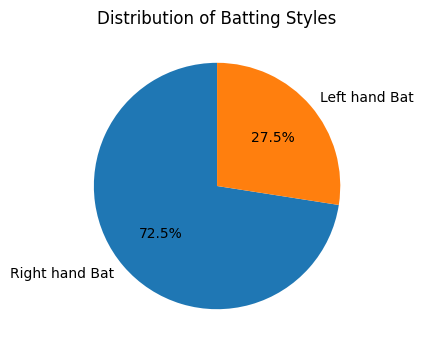

In [10]:
# ---  Exploratory Data Analysis (EDA) ---
print("\nStarting Step 3: EDA...")

# 1. Batting Styles (Pie Chart)
bat_style_counts = df_players['bat_style'].value_counts()
print(f"\nBatting Style Distribution:\n{bat_style_counts}")

plt.figure(figsize=(4, 4))
plt.pie(bat_style_counts, labels=bat_style_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Batting Styles')
# plt.savefig('batting_style_pie_chart.png')
# print("Saved batting_style_pie_chart.png")


Top 10 Bowling Styles:
bowl_style
Right arm Medium          137
Right arm Offbreak        128
Right arm Fast medium      81
Slow Left arm Orthodox     65
Right arm Medium fast      57
Name: count, dtype: int64


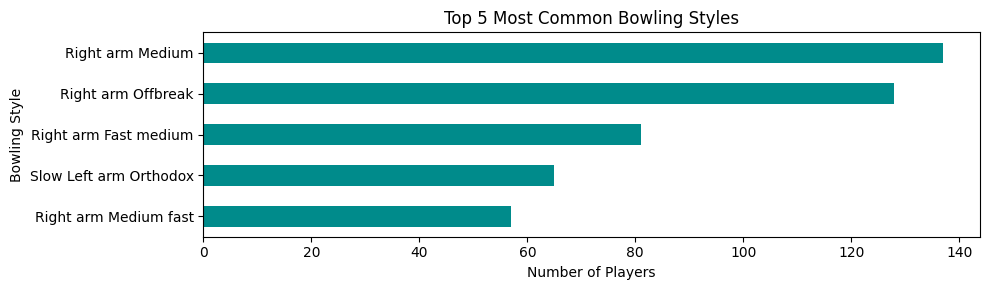

In [11]:
# 2. Bowling Styles (Bar Chart)
# We group 'Unknown' and other small categories if necessary, but let's see the top 10 first
bowl_style_counts = df_players['bowl_style'].value_counts().head(5)
print(f"\nTop 10 Bowling Styles:\n{bowl_style_counts}")

plt.figure(figsize=(10, 3))
# Sort ascending for horizontal bar chart
bowl_style_counts.sort_values(ascending=True).plot(kind='barh', color='darkcyan')
plt.xlabel('Number of Players')
plt.ylabel('Bowling Style')
plt.title('Top 5 Most Common Bowling Styles')
plt.tight_layout()
# plt.savefig('top_5_bowling_styles_bar_chart.png')
# print("Saved top_5_bowling_styles_bar_chart.png")

# ************************************************************************************************************************

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [3]:
#  Load Data

file_path = 'players_data_cleaned.csv'
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path)

Loading data from players_data_cleaned.csv...


In [4]:
# 2. Feature Engineering

print("\n--- Starting Feature Engineering ---")

# A custom function to clean 'field_pos'
# Logic: If it's not a Keeper, we assume they are a regular Fielder.
def clean_field_pos(pos):
    pos = str(pos).strip()
    if pos in ['Wicketkeeper', 'Occasional Wicketkeeper']:
        return pos
    else:
        return 'Fielder' # Grouping 'Unknown', blanks, and errors into 'Fielder'

# Apply the cleaning function
df['field_pos_cleaned'] = df['field_pos'].apply(clean_field_pos)

# Clean 'bowl_style' (replace empty spaces with 'Unknown')
df['bowl_style'] = df['bowl_style'].replace(' ', 'Unknown')

# Define Features (X) and Target (y)
# We will predict 'bat_style' based on bowling style and fielding position
X = df[['bowl_style', 'field_pos_cleaned']]
y = df['bat_style']

print("Features selected: bowl_style, field_pos_cleaned")
print("Target selected: bat_style")


--- Starting Feature Engineering ---
Features selected: bowl_style, field_pos_cleaned
Target selected: bat_style


In [5]:
# 3. Encoding Categorical Data

print("\n--- Encoding Data ---")

# Feature Encoding: OneHotEncoder for categorical features
# We use ColumnTransformer to apply it only to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bowl_style', 'field_pos_cleaned'])
    ])

# Target Encoding: LabelEncoder for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Target classes encoded: {list(le.classes_)}")


--- Encoding Data ---
Target classes encoded: ['Left hand Bat', 'Right hand Bat']


In [6]:
# 4. Split Data
print("\n--- Splitting Data ---")
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


--- Splitting Data ---
Training samples: 617, Testing samples: 155


In [7]:

# 5. Train All Models & Find Best Model
print("\n--- Training Models ---")

# Dictionary of models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear'), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    # Create a pipeline: Preprocess (Encode) -> Train Model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"{name}: Accuracy = {acc:.4f}")
    
    # Check if this is the best model so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print(f"\n>> BEST MODEL: {best_model_name} with Accuracy {best_accuracy:.4f}")


--- Training Models ---
Logistic Regression: Accuracy = 0.7806
Random Forest: Accuracy = 0.7935
Support Vector Machine: Accuracy = 0.7806
Gradient Boosting: Accuracy = 0.7806

>> BEST MODEL: Random Forest with Accuracy 0.7935



--- Finding Important Features ---
                              Feature  Importance
20  bowl_style_Slow Left arm Orthodox    0.301340
3     bowl_style_Left arm Medium fast    0.111942
2          bowl_style_Left arm Medium    0.107107
1     bowl_style_Left arm Fast medium    0.054209
0            bowl_style_Left arm Fast    0.048494
10   bowl_style_Right arm Fast medium    0.040631
21                 bowl_style_Unknown    0.037379
22          field_pos_cleaned_Fielder    0.036412
4      bowl_style_Left arm Wrist spin    0.035086
11        bowl_style_Right arm Medium    0.030448


C:\Users\Rohit\AppData\Local\Temp\ipykernel_12356\1236653935.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


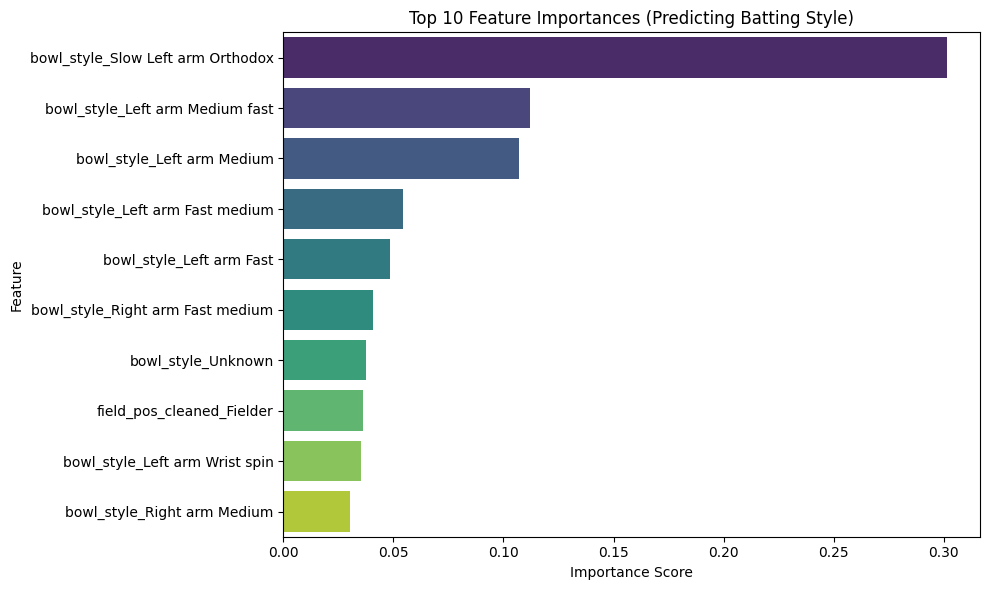

In [8]:
# 6. Important Feature Finding
print("\n--- Finding Important Features ---")

# We retrain the Random Forest model to extract feature importances
# (Tree-based models are best for this task)
rf_model = models['Random Forest']
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf_model)])
rf_pipeline.fit(X_train, y_train)

# Extract feature names generated by OneHotEncoder
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(['bowl_style', 'field_pos_cleaned'])

# Extract importance scores
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for nice display
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Predicting Batting Style)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()